In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

/home/dcarmody/Envs/ds-project3/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/dcarmody/Envs/ds-project3/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Populating the interactive namespace from numpy and matplotlib


In [2]:
oakland_historical_budgets = pd.read_csv('data/oakland_budget_history_depts.csv')

In [3]:
oakland_historical_budgets.head()

,budget_type,fiscal_year_range,department,total,general_fund
0,1,FY13-14,Administrative Services,50539644,29017007.0
1,1,FY13-14,Capital Improvement Projects,27455500,252000.0
2,1,FY13-14,City Administrator,29885269,14782414.0
3,1,FY13-14,City Attorney,12520583,4705200.0
4,1,FY13-14,City Auditor,1556461,1556461.0


In [4]:
oakland_historical_budgets.fiscal_year_range.unique()

array(['FY13-14', 'FY15-16', 'FY17-18', 'FY19-20', 'FY14-15', 'FY16-17',
       'FY18-19', 'FY20-21'], dtype=object)

In [5]:
year_mapper = {'FY13-14': 2013, 'FY15-16': 2015, 'FY17-18': 2017, 'FY19-20': 2019,
               'FY14-15': 2014, 'FY16-17': 2016, 'FY18-19': 2018, 'FY20-21': 2020}

In [6]:
oakland_historical_budgets['year'] = oakland_historical_budgets.fiscal_year_range.map(year_mapper)

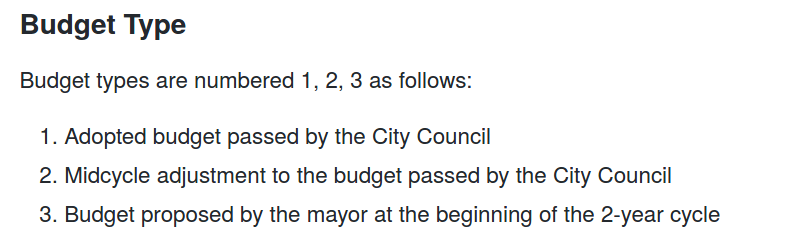

In [7]:
# Take only the adopted budget
adopted_budgets = oakland_historical_budgets[oakland_historical_budgets.budget_type == 1]

In [22]:
# Average total spending for Oakland
adopted_budgets.groupby(by='year').total.sum().mean()

1313004737.6666667

In [8]:
# Most recent fiscal year
most_recent_budget = adopted_budgets[adopted_budgets.fiscal_year_range == 'FY20-21']

In [10]:
# Total budget
most_recent_budget.total.sum()

1652052100

In [14]:
most_recent_budget.general_fund.sum()

684546119.0

In [13]:
most_recent_budget

,budget_type,fiscal_year_range,department,total,general_fund,year
288,1,FY20-21,Capital Improvement Projects,92860926,539280.0,2020
289,1,FY20-21,City Administrator,20337994,15166163.0,2020
290,1,FY20-21,City Attorney,21157209,14049152.0,2020
291,1,FY20-21,City Auditor,2426363,2426363.0,2020
292,1,FY20-21,City Clerk,5256344,3051643.0,2020
293,1,FY20-21,Department of Transportation,61994737,11707269.0,2020
294,1,FY20-21,Department of Violence Prevention,1177495,656665.0,2020
295,1,FY20-21,DPCC0 - City Council,6121027,6121027.0,2020
296,1,FY20-21,Economic and Workforce Development Department,15547339,5133807.0,2020
297,1,FY20-21,Finance Department,43802909,25702795.0,2020


In [29]:
# Department of Violence Prevention
most_recent_budget[most_recent_budget.department == 'Department of Violence Prevention'].total

294    1177495
Name: total, dtype: int64

In [30]:
1177495/1652052100

0.000712746892183364

In [27]:
# Race and equity
most_recent_budget[most_recent_budget.department == 'Race and Equity Department'].total

312    759313
Name: total, dtype: int64

In [28]:
759313/1652052100

0.0004596180713671197

In [11]:
# Police budget
most_recent_budget[most_recent_budget.department == 'Police Department'].total

310    330118936
Name: total, dtype: int64

In [12]:
# Fraction of budget spent on police
330118936.0/1652052100

0.1998235624651305

In [16]:
301809379/684546119

0.44088976713634687

In [24]:
police_budgets = adopted_budgets[adopted_budgets.department.isin(['Police','Police Department'])]

In [25]:
# Average police spending for Oakland
police_budgets.groupby(by='year').total.sum().mean()

258461538.33333334

In [43]:
police_budgets.sort_values(by='fiscal_year_range',inplace=True)

/home/dcarmody/Envs/ds-project3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(0.0, 400000000.0)

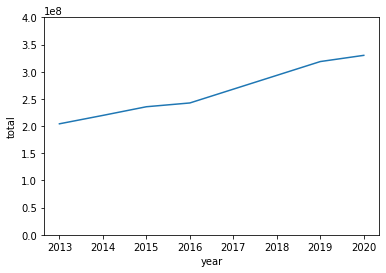

In [50]:
sns.lineplot(data=police_budgets,x='year',y='total')
ylim(0,400000000)